In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df_diagcode = pd.read_csv('files/DIAGNOSES_ICD.csv')#,dtype={'ICD9_CODE':str})#'ROW_ID':int,'SUBJECT_ID':int,'HADM_ID':int,'SEQ_NUM':int,'ICD9_CODE':str})
df_diagcode.info()
df_diagcode['ICD9_CODE'].nunique()
#df_diagcode['ICD9_CODE'] = df_diagcode['ICD9_CODE']
#df_diagcode['ICD9_CODE'] = df_diagcode['ICD9_CODE'][~df_diagcode['ICD9_CODE'].str.contains("[a-zA-Z]").fillna(False)]

#df_diagcode['ICD9_CODE'].fillna(value='999', inplace=True)
#df_diagcode.head(83)
#df_diagcode = df_diagcode[df_diagcode['ICD9_CODE'].notna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
ROW_ID        651047 non-null int64
SUBJECT_ID    651047 non-null int64
HADM_ID       651047 non-null int64
SEQ_NUM       651000 non-null float64
ICD9_CODE     651000 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


6984

In [36]:
#df_diagcode = df_diagcode[df_diagcode['ICD9_CODE'].notna()]
df_diagcode['ICD9_CODE'].replace(regex=r'^[a-zA-Z]\d*',value = '999', inplace=True)
df_diagcode['ICD9_CODE'].fillna(value= '999', inplace=True)#check this
df_diagcode['ICD9_CODE'] = df_diagcode['ICD9_CODE'].str.slice(start=0, stop=3, step=1)
df_diagcode['ICD9_CODE'] = df_diagcode['ICD9_CODE'].astype(int)
df_diagcode.head(83)

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,403
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,582
3,1300,109,172335,4.0,585
4,1301,109,172335,5.0,425
...,...,...,...,...,...
78,1538,117,164853,7.0,286
79,1539,117,164853,8.0,518
80,1540,117,164853,9.0,287
81,1541,117,164853,10.0,38


In [37]:
icd9_ranges = [(1, 140), (140, 240), (240, 280), (280, 290), (290, 320), (320, 390), 
               (390, 460), (460, 520), (520, 580), (580, 630), (630, 680), (680, 710),
               (710, 740), (740, 760), (760, 780), (780, 800), (800, 1000)]

# Associated category names
diag_list = ['d_infectious','d_neoplasms','d_endocrine','d_blood',
            'd_mental', 'd_nervous', 'd_circulatory', 'd_respiratory',
            'd_digestive','d_genitourinary', 'd_pregnancy', 'd_skin', 
            'd_muscular', 'd_congenital','d_prenatal','d_ill-defined',
            'd_injury']

for num, cat_range in enumerate(icd9_ranges):
    df_diagcode['ICD9_CODE'] = np.where(df_diagcode['ICD9_CODE'].between(cat_range[0],cat_range[1]), num, df_diagcode['ICD9_CODE'])
    #df_diagcode['cat'] = diag_list[num]
for i in range (len(df_diagcode['ICD9_CODE'])):
    df_diagcode['ICD9_CODE'][i] = diag_list[df_diagcode['ICD9_CODE'][i]]

#df_diagcode.to_csv('merge_d.csv',index=False)
df_diagcode.head(30)


   

C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,d_circulatory
1,1298,109,172335,2.0,d_respiratory
2,1299,109,172335,3.0,d_genitourinary
3,1300,109,172335,4.0,d_genitourinary
4,1301,109,172335,5.0,d_circulatory
5,1302,109,172335,6.0,d_endocrine
6,1303,109,172335,7.0,d_skin
7,1304,109,172335,8.0,d_endocrine
8,1305,109,172335,9.0,d_muscular
9,1306,109,172335,10.0,d_circulatory


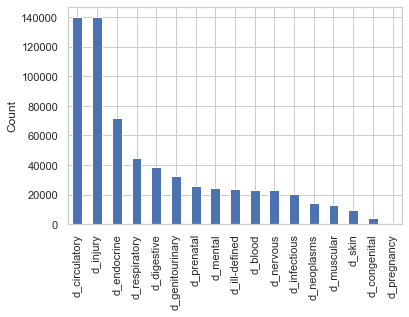

In [38]:
plt.ylabel('Count')
#plt.title('Distribution of LOS')
df_diagcode['ICD9_CODE'].value_counts().plot(kind="bar")

In [39]:
#df_cat = pd.DataFrame()

#df_diagcode = df_diagcode.sort_values(by=['HADM_ID']).reset_index(drop=True)
#df_group = df_diagcode.groupby('HADM_ID')
#df_cat = df_group.agg({
#    'ICD9_CODE': 'count'
#}).reset_index()

#df_cat.columns = ['HADM_ID','no_Diagnosis']
hadm_list = df_diagcode.groupby('HADM_ID')['ICD9_CODE'].apply(list).reset_index()
hadm_item = pd.get_dummies(hadm_list['ICD9_CODE'].apply(pd.Series).stack()).sum(level=0)
df_cat = hadm_item.join(hadm_list['HADM_ID'], how="outer")
df_cat


,d_blood,d_circulatory,d_congenital,d_digestive,d_endocrine,d_genitourinary,d_ill-defined,d_infectious,d_injury,d_mental,d_muscular,d_neoplasms,d_nervous,d_pregnancy,d_prenatal,d_respiratory,d_skin,HADM_ID
0,0,2,0,2,5,2,0,0,2,0,0,0,2,0,0,0,1,100001
1,1,2,0,4,0,0,1,1,0,0,0,0,0,0,0,0,0,100003
2,0,0,0,0,1,0,1,0,2,1,0,1,0,0,0,3,0,100006
3,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,100007
4,1,7,0,0,3,0,0,0,7,0,0,0,0,0,0,0,0,100009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,199993
58972,0,4,0,0,1,1,0,0,0,0,0,0,0,0,0,3,0,199994
58973,0,4,1,0,0,0,0,1,1,3,0,0,0,0,0,0,0,199995
58974,0,7,0,0,2,0,1,0,5,0,0,0,0,0,0,1,0,199998


In [40]:
#df_cat['diag_injury'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='injury'))
#df_cat['diag_infectious'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='infectious'))
#df_cat['diag_neoplasms'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='neoplasms'))
#df_cat['diag_endocrine'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='endocrine'))
#df_cat['diag_blood'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='blood'))
#df_cat['diag_mental'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='mental'))
#df_cat['diag_nervous'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='nervous'))
#df_cat['diag_circulatory'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='circulatory'))
#df_cat['diag_respiratory'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='respiratory'))
#df_cat['diag_digestive'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='digestive'))
#df_cat['diag_genitourinary'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='genitourinary'))
#df_cat['diag_pregnancy'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='pregnancy'))
#df_cat['diag_skin'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='skin'))
#df_cat['diag_muscular'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='congenital'))
#df_cat['diag_prenatal'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='prenatal'))
#df_cat['diag_congenital'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='congenital'))
#df_cat['diag_misc'] = df_group['ICD9_CODE'].transform(lambda x: sum(x=='misc'))


df_cat.head(50)

,d_blood,d_circulatory,d_congenital,d_digestive,d_endocrine,d_genitourinary,d_ill-defined,d_infectious,d_injury,d_mental,d_muscular,d_neoplasms,d_nervous,d_pregnancy,d_prenatal,d_respiratory,d_skin,HADM_ID
0,0,2,0,2,5,2,0,0,2,0,0,0,2,0,0,0,1,100001
1,1,2,0,4,0,0,1,1,0,0,0,0,0,0,0,0,0,100003
2,0,0,0,0,1,0,1,0,2,1,0,1,0,0,0,3,0,100006
3,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,100007
4,1,7,0,0,3,0,0,0,7,0,0,0,0,0,0,0,0,100009
5,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,100010
6,1,0,0,0,0,0,0,0,11,1,0,0,0,0,0,1,0,100011
7,0,3,0,0,1,0,0,0,7,0,0,0,0,0,0,0,0,100012
8,0,0,0,0,1,0,0,0,1,1,5,0,0,0,0,0,0,100014
9,0,1,1,1,2,0,0,0,1,1,0,0,1,0,0,3,0,100016


In [41]:
#df_cat.to_csv('Diagnosis.csv',index=False)

In [42]:
#df_cat = pd.read_csv('Diagnosis.csv')
df = pd.read_csv('data_adm.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53104 entries, 0 to 53103
Data columns (total 14 columns):
SUBJECT_ID            53104 non-null int64
HADM_ID               53104 non-null int64
ADMITTIME             53104 non-null object
DEATHTIME             0 non-null float64
ADMISSION_TYPE        53104 non-null object
ADMISSION_LOCATION    53104 non-null object
DISCHARGE_LOCATION    53104 non-null object
INSURANCE             53104 non-null object
LANGUAGE              30592 non-null object
RELIGION              52743 non-null object
MARITAL_STATUS        53104 non-null object
ETHNICITY             53104 non-null object
DIAGNOSIS             53080 non-null object
LOS                   53104 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 5.7+ MB


In [43]:
df = df.merge(df_cat, how='inner', on='HADM_ID')
df.info()
df.to_csv('merge_diag.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53104 entries, 0 to 53103
Data columns (total 31 columns):
SUBJECT_ID            53104 non-null int64
HADM_ID               53104 non-null int64
ADMITTIME             53104 non-null object
DEATHTIME             0 non-null float64
ADMISSION_TYPE        53104 non-null object
ADMISSION_LOCATION    53104 non-null object
DISCHARGE_LOCATION    53104 non-null object
INSURANCE             53104 non-null object
LANGUAGE              30592 non-null object
RELIGION              52743 non-null object
MARITAL_STATUS        53104 non-null object
ETHNICITY             53104 non-null object
DIAGNOSIS             53080 non-null object
LOS                   53104 non-null float64
d_blood               53104 non-null uint8
d_circulatory         53104 non-null uint8
d_congenital          53104 non-null uint8
d_digestive           53104 non-null uint8
d_endocrine           53104 non-null uint8
d_genitourinary       53104 non-null uint8
d_ill-defined        

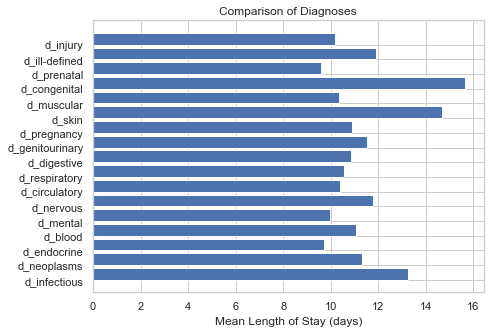

In [44]:
import seaborn as sns
# Look at the median LOS by diagnosis category
diag_cat_list = ['d_infectious','d_neoplasms','d_endocrine','d_blood',
            'd_mental', 'd_nervous', 'd_circulatory', 'd_respiratory',
            'd_digestive','d_genitourinary', 'd_pregnancy', 'd_skin', 
            'd_muscular', 'd_congenital','d_prenatal','d_ill-defined',
            'd_injury']
results = []
for variable in diag_cat_list:
    results.append(df[[variable, 'LOS']].groupby(variable).mean().reset_index().values[1][1])

sns.set(style="whitegrid")
#sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7,5))
ind = range(len(results))
ax.barh(ind, results, align='edge')
ax.set_yticks(ind)
ax.set_yticklabels(diag_cat_list)
ax.set_xlabel('Mean Length of Stay (days)')
ax.tick_params(left=False, right=False, top=False) 
ax.set_title('Comparison of Diagnoses'.format(variable))
plt.show();